<a href="https://colab.research.google.com/github/HKRcodes/Credit-Card-Validation-Program/blob/main/Credit_Card_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PACKAGES**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


**DATA HANDLING**

In [5]:
df=pd.read_csv('/content/Application_Data.csv')
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


**DATA PREPARATION**

In [6]:
df.dropna(inplace=True)
df=df.drop(['Applicant_ID','Applicant_Gender','Total_Income','Income_Type','Education_Type','Family_Status','Housing_Type'],axis=1)

xVars=df.drop(['Status','Job_Title'],axis=1)
yVars=df[['Status']]

xTrain,xValid,yTrain,yValid= train_test_split(xVars,yVars,test_size=0.25, random_state=50 )

print(xTrain.shape)
print(df.shape)
print(xValid.shape)
print(yTrain.shape)
print(yValid.shape)

(18846, 12)
(25128, 14)
(6282, 12)
(18846, 1)
(6282, 1)


In [7]:
print("X-Vars : \n",xVars)
print("Y-Vars : \n",yVars)
print("df : \n",df)

X-Vars : 
        Owned_Car  Owned_Realty  Total_Children  Owned_Mobile_Phone  \
0              1             1               0                   1   
1              0             1               0                   1   
2              0             1               0                   1   
3              0             1               0                   1   
4              0             1               0                   1   
...          ...           ...             ...                 ...   
25123          1             1               1                   1   
25124          1             1               1                   1   
25125          1             1               1                   1   
25126          1             1               1                   1   
25127          1             0               0                   1   

       Owned_Work_Phone  Owned_Phone  Owned_Email  Total_Family_Members  \
0                     0            0            0                     2  

**Random Forest**


In [8]:
regressor =RandomForestRegressor(n_estimators=1000,random_state=50 )
regressor.fit(xTrain,yTrain)

<ipython-input-8-47dbbdc867a7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(xTrain,yTrain)


RandomForestRegressor(n_estimators=1000, random_state=50)

**PREDICTION OUTPUT**

In [9]:
y_pred = regressor.predict(xValid)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [10]:
y_pred = pd.DataFrame(y_pred, columns=['y Predict'])
print("y pred : \n",y_pred)
print("y valid : \n",yValid)

y pred : 
       y Predict
0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
...         ...
6277        1.0
6278        1.0
6279        1.0
6280        1.0
6281        1.0

[6282 rows x 1 columns]
y valid : 
        Status
10178       1
5536        1
15054       1
6364        1
20787       1
...       ...
17404       1
7241        1
11495       1
3669        1
3997        1

[6282 rows x 1 columns]


**GRAPH PLOT**

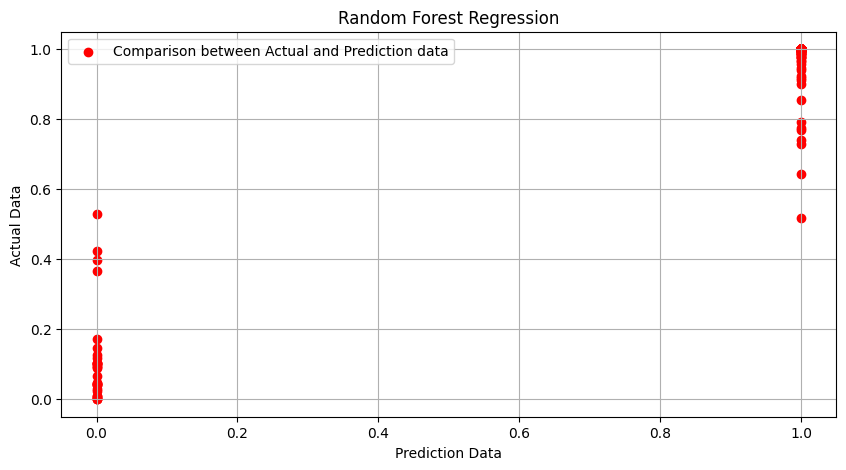

In [11]:
plt.figure(figsize = (10,5))
plt.scatter(yValid, y_pred, color='red', label='Comparison between Actual and Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

**EVALUATION**

In [12]:
metrics.r2_score(yValid, y_pred)

0.94838231368

**PREDICTING LABEL FOR NEW USER**

In [34]:
new_user_data = {}
print("Enter data of the new user to predict\n")
user_data = pd.DataFrame(columns=[column for column in xVars.columns])

for column in user_data.columns:
  value = int(input(f"Enter value for {column} : "))
  new_user_data[column] = value

# Use the loc method to add the new row to the DataFrame
user_data.loc[len(user_data)] = new_user_data
  
print("\nUser_data : \n\n",user_data)
user_pred = regressor.predict(user_data)
print("\nThe predicted status for the user is : ",user_pred[user_pred.argmax()])

Enter data of the new user to predict

Enter value for Owned_Car : 1
Enter value for Owned_Realty : 1
Enter value for Total_Children : 1
Enter value for Owned_Mobile_Phone : 1
Enter value for Owned_Work_Phone : 1
Enter value for Owned_Phone : 1
Enter value for Owned_Email : 1
Enter value for Total_Family_Members : 4
Enter value for Applicant_Age : 34
Enter value for Years_of_Working : 6
Enter value for Total_Bad_Debt : 1
Enter value for Total_Good_Debt : 2

User_data : 

    Owned_Car  Owned_Realty  Total_Children  Owned_Mobile_Phone  \
0          1             1               1                   1   

   Owned_Work_Phone  Owned_Phone  Owned_Email  Total_Family_Members  \
0                 1            1            1                     4   

   Applicant_Age  Years_of_Working  Total_Bad_Debt  Total_Good_Debt  
0             34                 6               1                2  

The predicted status for the user is :  0.983
